In [1]:
library(ggplot2)

In [2]:
args <- c("../experiments/SFM_3/v2.09.1_sim_sfm3_1plastic/", 
          "../experiments/SFM_3/v2.09.1_growth_parameters/", 
          "EU_avg")

picPath <- "./"

In [3]:
filename <- paste(args[1], "hardcoded_parameters.csv", sep = "")
params <- read.delim(filename, header = TRUE)

NFluxMode <- params$NFluxModes
FluxNGAM <- params$NGAM
flowrate <- params$flowRate

In [4]:
clDarkBlue <-rgb(0.2, 0.3, 0.8, alpha = 0.5)
clDarkRed <- rgb(0.7, 0.1, 0.1, alpha = 0.5)
clTransparent <- rgb(0.95, 0.95, 0.95, alpha = 0.2)

In [5]:
getSpeciesList <- function(cult_type){
  # load data from file
  filename <- paste(args[1], "experiments/", cult_type, "_mono-culture/", args[3], "/species_trajectory.tsv", sep = "")
  data <- read.delim(filename, header = TRUE)
  
  # compute auxiliary variables 
  data$od1 <- data$od * data$fraction_alive
  
  # store list of species
  assign("speciesList", as.list(levels(data$species_name)), envir = .GlobalEnv)
}

In [6]:
getSpeciesList("batch")
speciesList

[[1]]
[1] "Bifidobacterium_longum_E18"

In [7]:
cult_type <- "batch"
species <- "Bifidobacterium_longum_E18"

plotRef <- FALSE
pmax <- 0.5

# load data from file
filename <- paste(args[1], "experiments/", cult_type, "_mono-culture/", args[3], "/species_trajectory.tsv", sep = "")
data <- read.delim(filename, header = TRUE)

# filter for focal species
data <- data[data$species_name == species, ]

# compute auxiliary variables 
rmax <- data$rdom_max[1]
maxOD <- max(data$od)
data$od_rel <- data$od
data$r_rel <- data$r
f <- function(x, y) { if(x > 0.0) return(min(c(y, pmax))) else return(0.0) }
for(i in 1 : NFluxMode) {
    pi <- paste("p", i - 1, sep ="_")
    ri <- paste("r", i - 1, sep ="_") 
    data[, pi] <- mapply(f, data[, ri], data[, pi])
    data[, paste("r", i - 1, "rel", sep ="_")] <- data[, ri]
}
  

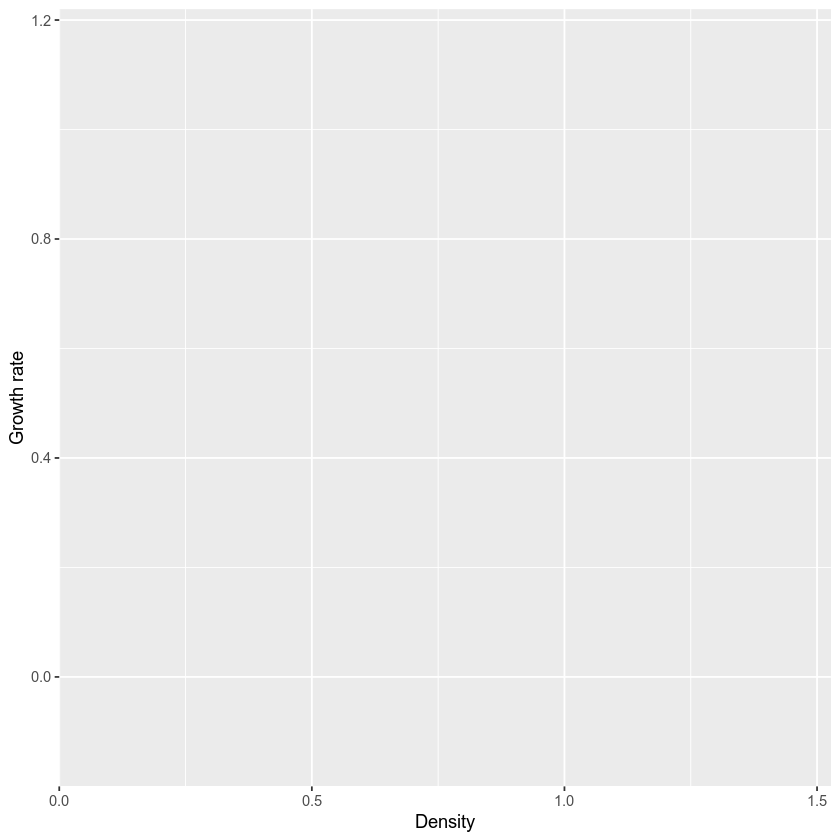

In [8]:
# plot growth rate as a function of OD
pl <- ggplot(data, aes(x = od_rel)) +
    labs(x = "Density", y = "Growth rate") +
    scale_x_continuous(limits = c(-0.0, maxOD + 0.1 * maxOD), expand = c(0, 0)) +
    scale_y_continuous(limits = c(-(FluxNGAM + 0.1), rmax + 0.1 * rmax), expand = c(0, 0)) +
    scale_color_gradient2(low = clTransparent, mid = clDarkBlue, high = clDarkRed, midpoint = 0.5 * pmax, guide = FALSE) +
    scale_size_area(max_size = 1.5, guide = FALSE)
pl

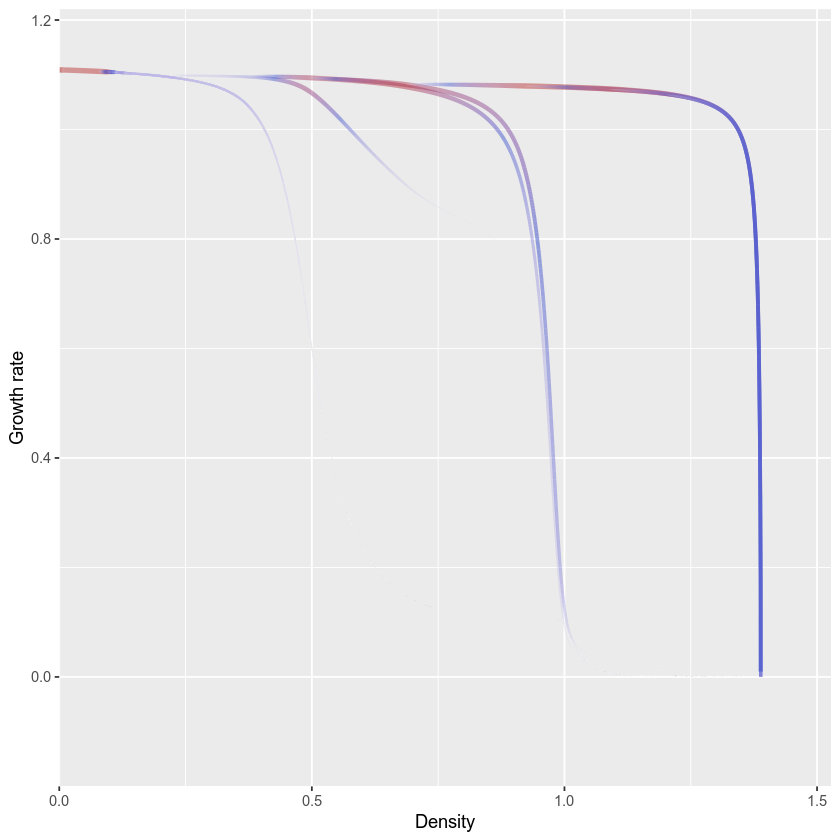

In [9]:
for(i in 1 : NFluxMode) { 
    pi <- paste("p", i - 1, sep ="_")
    ri <- paste("r", i - 1, "rel", sep ="_")
    pl <- pl + geom_path(aes_string(y = ri, col = pi, size = pi))
}

pl